# Day 1

In [16]:
min_ = 0
max_ = 99
inputs = [
    "L68",
    "L30",
    "R48",
    "L5",
    "R60",
    "L55",
    "L1",
    "L99",
    "R14",
    "L82",
]

In [ ]:

cur = 50
inputs = [line.strip() for line in open("inputs/1.txt").readlines() if len(line) > 0]
# print(len(inputs))
def rotate(dial, rotation):
    
    zero_crossings = 0
    
    side = True if rotation[0] == "R" else False
    
    
    def add(x, i):
        
        if x == 99:
            return 0
        else:
            return x + 1
        
    def subtract(x, i):
        if x == 0:
            return 99
        else:
            return x - 1
            
        
        
    if side:
        # rotate right - increase 
        # dial += int(rotation[1:])
        dials = [] 
        for _ in range(1, int(rotation[1:]) + 1):
            dial = add(dial, 1)
            dials.append(dial)
        return dials[-1], dials.count(0)
    else:
        # rotate left - decrease
        # dial -= int(rotation[1:])
        dials = []
        for _ in range(1, int(rotation[1:]) + 1):
            dial = subtract(dial, 1)
            dials.append(dial)
        return dials[-1], dials.count(0)
        


history = []
total_zero_crossings = 0
for i in inputs:
    # print(i)
    cur, cross = rotate(cur, i)
    # print(f"This dial is rotated {i} to point at {cur} ---- zero crossings: {cross}")
    # history.append(cur)
    
    total_zero_crossings += cross
    
    
    

print(f"Code is", total_zero_crossings)

Code is 6530


# Day 2

In [ ]:
original_case =[[ int(x) for x in  r.split("-")] for r in  open("inputs/2.txt").read().split(",")]
small_case = [
    [11, 22],
    [95, 115],
    [998, 1012],
    [1188511880, 1188511890],
    [222220, 222224],
    [1698522, 1698528],
    [446443, 446449],
    [38593856, 38593862],
    [565653, 565659],
    [824824821, 824824827],
    [2121212118, 2121212124],
]

In [ ]:
primes = [2,3,5,7,11]

def get_divisors(num: int) -> list[int]:
    num_length = len(str(num))
    if num in primes:
        return []
    else:
        divisors = []
        s = len(str(num))
        prime_index = 0
        selected_prime = primes[prime_index]
        
        while s != 1:
            # print(f"Selected Prime: {selected_prime}, {s} % {selected_prime} = {s % selected_prime}" )
            if s % selected_prime == 0:
                
                # print("Divisor", s / selected_prime)
                divisors.append(s / selected_prime)
                if prime_index == 0:
                    divisors.append(selected_prime)
                s /= selected_prime
            else:
                prime_index += 1
                selected_prime = primes[prime_index]
        # print(divisors)
        divisors = [int(d) for d in divisors if int(d) != 1]
        
        return list(set(divisors))

def check_for_invalidnes(num: int) -> int:
    # return num - if invalid 
    # else return 0

    divisors = get_divisors(num)
    num_str = str(num)
    if len(num_str) == 1:
        return 0
    
    if len(set(list(num_str))) == 1:
        # print(num, set(list(num_str)))
        return num
    
    for d in divisors:
        
        substring = num_str[:d]
        
        sub_strs = []
        for i in range(len(num_str) // d):
            sub_strs.append(
                num_str[i *d: (i + 1) * d]
            )
        
        if all(substring == s for s in sub_strs) and len(sub_strs) > 1:
            # print(num_str, sub_strs)
            return num        
    return 0

In [3]:
case = original_case
def check_for_range(start: int, end: int) -> list[int]:    
    checks = [check_for_invalidnes(i)  for i in range(start, end + 1)]
    checks = [ x for x in checks if x > 0]
    return checks

checks = [] 
for r in case:   
    checks.extend(check_for_range(r[0], r[1]))
sum(checks)
    

27180728081

# Day 3

In [ ]:
banks = [
    "987654321111111",
    "811111111111119",
    "234234234234278",
    "818181911112111",
]
outputs = [
    987654321111, 
    811111111119, 
    434234234278,
    888911112111
]
banks = [x.strip() for x in open('inputs/3.txt').readlines()]

In [21]:

def find_max(bank):
    needs_selection_count = 12
    digits = [int(i)for i in list(bank)]
    
    start_pointer = 0
    
    def find_sub_max(digits_, needs_selection_count):
        # print("Finding sub max", digits_)
        
        # apply selection range possiblity - digits_[:len(digits) - needs_selection_count - 1]
        if len(digits_) == 0:
            return 0, 0
        selection_range = digits_[ :len(digits_) - (needs_selection_count - 1)]
        # print("Selection range", selection_range)
        max_digit = max(selection_range)
        # print("Max digit", max_digit, "Index", selection_range.index(max_digit))
        return max_digit, selection_range.index(max_digit)
    # find max
    nums = []
    
    while needs_selection_count > 0:
        # print("Start pointer", start_pointer, "Digits ", digits, "Output len", needs_selection_count)
        num, index = find_sub_max(digits, needs_selection_count )
        # squueze the digits
        digits = digits[1 + index:]
        start_pointer += index
        
        
        needs_selection_count -= 1
        start_pointer += 1
        nums.append(num)
        
    
    # output = int("".join(str(x) for x in nums))
    # print("Output", output)
    return int("".join(str(x) for x in nums))

# a = find_max(banks[0]) == outputs[0]
# b = find_max(banks[1]) == outputs[1]
# c = find_max(banks[2]) == outputs[2]
# d = find_max(banks[3]) == outputs[3]
sum([ find_max(bank) for bank in banks])

171419245422055

# Day 4

In [ ]:
small_case= [ list(x) for x in """..@@.@@@@.
@@@.@.@.@@
@@@@@.@.@@
@.@@@@..@.
@@.@@@@.@@
.@@@@@@@.@
.@.@.@.@@@
@.@@@.@@@@
.@@@@@@@@.
@.@.@@@.@.""".split("\n")]
test_small_case = [list(x) for x in """..xx.xx@x.
x@@.@.@.@@
@@@@@.x.@@
@.@@@@..@.
x@.@@@@.@x
.@@@@@@@.@
.@.@.@.@@@
x.@@@.@@@@
.@@@@@@@@.
x.x.@@@.x.""".split("\n") ]

original_case = [list(x) for x in open("inputs/4.txt").read().split("\n") if len(x) > 0]
len(original_case)


137

In [25]:
case = original_case

y_len = len(case)
x_len = len(case[0])


def calculate_adjacents(y: int,x: int, print_ = False) -> bool:
    eigth_positions = [
        [[y-1, x-1], [y-1, x], [y -1, x+1]],
        [[y, x - 1], [y, x], [y, x +1]],
        [[y +1, x-1], [y +1, x], [y +1, x+1]]
    ]
    count = 0
    l = [[0,0,0],[0,0,0],[0,0,0]]
    for i, row in enumerate(eigth_positions):
        for j, cell in enumerate(row):
            if cell[0] < 0 or cell[0] >= y_len or cell[1] < 0 or cell[1] >= x_len:
                continue
            if case[cell[0]][cell[1]] == "@":
                count += 1
            l[i][j] = case[cell[0]][cell[1]]
    
    if print_:
        print(f"Calculating Adjust for position: {y}:{x}")
        print(
            f"Count: {count}"
        )
        print("Around: ")
        for pos in l:
            print(pos)
            
    if count < 5:
        return True
    else:
        return False


output = [ ["" for _ in range(x_len)] for _ in range(y_len)]

remove_count = -1
total_removes = 0
iter = 1
while remove_count != 0:
# for i in range(2):
    remove_count = 0
    # print("Iteration", iter)
    # print("Case: ")
    # for y in case:
    #     print(y)
    for y in range(len(case)):
        for x in range(len(case[y])):
            if case[y][x] == "@":
                if calculate_adjacents(y,x):
                    output[y][x] = "x"
                    remove_count += 1
                else:
                    output[y][x] = "@"
            else:
                output[y][x] = case[y][x]
    # print("Removed Count", remove_count)
    total_removes += remove_count
    # print("X Count", sum(row.count("x") for row in output))     
    # replace x with .
    for y in range(len(output)):
        for x in range(len(output[y])):
            if output[y][x] == "x":
                output[y][x] = "."
    # print output
    # for y in output:
    #     print(y)
        
    # copy output to case value by value 
    for i in range(len(case)):
        for j in range(len(case[i])):
            case[i][j] = output[i][j]
            
    iter += 1
total_removes

8727

# Day 5

In [ ]:


fresh_ranges = []
items = []
with open("inputs/5.txt", "r") as f:
    ranges_ = True
    for line in f.readlines():
        if line.strip() == "":
            ranges_ = False
            continue
        
        if ranges_:
            fresh_ranges.append(line.strip())
        else:
            items.append(line.strip())
        
fresh_ranges = [list[int](map(int, x.split("-"))) for x in fresh_ranges]
items: list[int] = [int(x) for x in items]


In [43]:
# here is the logic
# merge the ranges until there is not overlapping between them.
# fresh_ranges = [[23, 45], [10, 20], [25, 30], [28, 35], [40, 50], [50, 55], [52, 70], [70, 75]]


# items = [
#     1,
#     5,
#     8,
#     11,
#     17,
#     32,
# ]

merges_count = -1
while merges_count != 0:
    merges_count = 0
    start_pointer = 0
    
    print("Starting New Loop", start_pointer, "Fresh Ranges", fresh_ranges)
    if start_pointer == len(fresh_ranges):
        break
    
    while start_pointer < len(fresh_ranges):
        print("Start pointer", start_pointer, "Fresh Ranges", fresh_ranges)
        initial_range = fresh_ranges[start_pointer]
        merged_indexes = []
        for i in range(start_pointer + 1, len(fresh_ranges)):
            next_range = fresh_ranges[i]
            # print("Checking", initial_range, next_range)
            # they should be merged if they overlap somehow
            # overlap can be in two cases --- 
            # 1. Start or End of initial range is inside the next range
            # 2. Start or End of next range is inside the initial range
            if (initial_range[0] <= next_range[1] and initial_range[1] >= next_range[0]) or (initial_range[1] >= next_range[0] and initial_range[1] <= next_range[1]):
                # merge the ranges
                print(f"Merging {initial_range} and {next_range}")
                initial_range = [min(initial_range[0], next_range[0]), max(initial_range[1], next_range[1])]
                merged_indexes.append(i)
                continue
            
            if (next_range[0] <= initial_range[1] and next_range[0] >= initial_range[0]) or (next_range[1] <= initial_range[1] and next_range[1] >= initial_range[0]):
                print(f"Merging {initial_range} and {next_range}")
                # merge the ranges
                initial_range = [min(initial_range[0], next_range[0]), max(initial_range[1], next_range[1])]
                merged_indexes.append(i)
                continue
        # delete indexes which are in merged_indexes
        for index in sorted(merged_indexes, reverse=True):
            fresh_ranges.pop(index)

        fresh_ranges[start_pointer] = initial_range
        
        start_pointer += 1
        if merges_count == -1:
            merges_count = 0
        if len(merged_indexes) > 0:
            merges_count += 1



Starting New Loop 0 Fresh Ranges [[3384729050352, 7936448865239], [312542493529001, 320844283048233], [303215714751321, 303735832077393], [546740807916189, 549412906179109], [124142120159789, 127994203959965], [394633278461814, 401016693111406], [362997310654984, 366215347021267], [413187907367115, 414636918654187], [424382456594934, 427128363337448], [301680037760787, 302022332154203], [451055517112338, 451662620418543], [292812026804013, 297797922592373], [543409889958542, 545446795352377], [303215714751321, 303897178961423], [383257749958934, 388435186451742], [418761168111785, 420268119646272], [131051704110719, 140267113512819], [70961678360746, 79762664649102], [449468975877419, 449972465261935], [238584967106047, 240751752098768], [445454462896746, 446132594160350], [273293089335592, 280666646471232], [419713295551922, 421244973392734], [41444440920570, 47393310442971], [65755668729294, 67074670290255], [515273536092893, 519097653031920], [474336877375946, 480805391441170], [443

In [46]:
# calculate the number of fresh items
sum([(r[1] - r[0]) + 1 for r in fresh_ranges])

361615643045059

In [42]:
def check_item(item_id: str) -> int:
    for range in fresh_ranges:
        if item_id >= range[0] and item_id <= range[1]:
            print(f"Item {item_id} is fresh in range {range}")
            return 1
    return 0


fresh_count = 0
for item in items:
    fresh_count += check_item(item)
fresh_count

Item 113678786011556 is fresh in range [113354757126561, 119826159727258]
Item 376747449339239 is fresh in range [372587280533943, 378794296234332]
Item 255813691974864 is fresh in range [255141416418854, 258177834185555]
Item 158097770050209 is fresh in range [156398618509029, 159850844752348]
Item 277846691711120 is fresh in range [273293089335592, 280666646471232]
Item 114000553775945 is fresh in range [113354757126561, 119826159727258]
Item 293284175994623 is fresh in range [292812026804013, 297797922592373]
Item 284944299861716 is fresh in range [283694052520056, 290790959835653]
Item 35635850604159 is fresh in range [30531462364170, 35999992917716]
Item 94394963249917 is fresh in range [92458065527868, 96147863006514]
Item 24506680968464 is fresh in range [21972327936713, 26485834025891]
Item 489114277748797 is fresh in range [485598735022966, 490890772061579]
Item 426778294335202 is fresh in range [424382456594934, 427128363337448]
Item 63963025295351 is fresh in range [63724381

707

# 6

In [ ]:
import enum


small_case = """
123 328  51 64 
 45 64  387 23 
  6 98  215 314
*   +   *   +  
"""
"""
123456789ABCDEF
"""
big_case = open("inputs/6.txt").read()
small_case = [ x for x in  small_case.split("\n") if len(x) > 0 ]
big_case = [ x for x in big_case.split("\n") if len(x) > 0 ]

last_line = big_case[-1]
column_positions = []
column_started = 0
column_end = 0
for i, char in enumerate(last_line):
    if char == " ":
        column_end = i
    else:
        column_positions.append([column_started, column_end])
        column_end = i
        column_started = i

column_positions.append([column_started, len(last_line)])
column_positions = column_positions[1:]
column_positions
first_line = big_case[0]
columns = [[] for _ in range( len(column_positions))]

print(columns)

for i,  pos in enumerate( column_positions):
    columns[i] = [x[pos[0]:pos[1]] for x in big_case]
    
    
# big_case = open("inputs/6.txt").read()
# big_case = [[y for y in x.split(" ") if len(y) > 0] for x in big_case.split("\n") if len(x) > 0]
# big_case[-1]
columns

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],

[['87', '61', '79', '73', '* '],
 ['12', '88', '46', ' 4', '* '],
 ['1179', '884 ', '491 ', '77  ', '+   '],
 ['  68', ' 877', '5165', '4891', '+   '],
 [' 3', ' 6', '56', '51', '* '],
 ['5 ', '6 ', '29', '42', '+ '],
 ['681', '258', '831', '  4', '+  '],
 ['751', '735', '926', '193', '*  '],
 ['36', '86', '4 ', '9 ', '* '],
 ['537', '878', '241', '  2', '*  '],
 ['35', '17', '82', ' 7', '+ '],
 [' 25', '777', '219', '299', '+  '],
 ['957 ', '3114', '2149', '9878', '+   '],
 ['4578', '4722', '433 ', '537 ', '+   '],
 ['75  ', '486 ', '772 ', '2222', '+   '],
 ['69', '64', ' 7', ' 2', '* '],
 ['731', '62 ', '7  ', '8  ', '+  '],
 [' 63', '188', '278', '486', '*  '],
 ['81', '62', '52', '36', '* '],
 ['152', '16 ', '79 ', '47 ', '*  '],
 ['71 ', '417', '981', '824', '*  '],
 ['481 ', '3424', '9129', '6317', '+   '],
 ['798', '329', ' 86', '  9', '+  '],
 ['87', '36', ' 6', ' 4', '* '],
 ['253', '795', '769', '61 ', '+  '],
 ['2743', '8741', '4441', '17  ', '+   '],
 ['58', '36', ' 2', ' 

In [74]:
column_positions

[]

In [73]:
big_case

'87 12 1179   68  3 5  681 751 36 537 35  25 957  4578 75   69 731  63 81 152 71  481  798 87 253 2743 58 5  213 68 45 55 15 72 23   8 173 25 375 254  7 8286 93  6 96 3616 68  691 46  7   191 2   19   8    56 8   183 2  215 6   13 16  62 223    9 99 3   528  1  76 964 117 9  57 6   57  1 988 221 45 51 828 68 85 4139 828 56 7429 29  247 36 5   12  22 36 73 9393 35 34 2368 1   828   1   5 756   43 299 115   68 3  92 155  39 242 31 3     9 222 13   4 8221  6  727 59 5895 987  2 13 72 212 85 1933 43 6   67 649 48  46   33 5783   7 5  9  4571 357 889 6159 595 874 251 11 158 4  81  9246 81 73 15 5   5  91 17   684 11 25 181 4982 39 6433 81 1421 436 273 123 3393  8 86   6 427 2  2466 7648 615 824 87   92 99 92 213 951 958 858 6766    1 9281 48  96  5 92 39 24  5 2  911   6  14 7472  12  3 55 18  97 44  3 273 8  27 836 297 9  6   737 775 2679 2267 6  2829 93 25 975  7 98 86  74 94 6   88 99 98 256 75  26 338 434  42 553 295 43   57 4   952 1   654 15  269 35 443 22 84 117 794  16 677 4  71 9  

In [78]:

def get_numbers(numbers: list[str]) -> list[str]:
    # 64
    # 23 
    # 314
    # find the most length number first
    
    numbers_grid = [ list(x) for x in numbers]
    # print("Numbers grid")
    # for row in numbers_grid:
        # print(row)
    
    # now make the numbers again
    numbers_output = [""] * len(numbers)
    for row in numbers_grid:
        for i, digit in enumerate(row):
            numbers_output[i] += str(digit)
    # print("Numbers output")
    # print(numbers_output)
    # delete leading zeros
    print("Numbers output after stripping")
    numbers_output = [x.strip() for x in numbers_output if len(x) > 0]
    print(numbers_output)
    return numbers_output
        

def apply_math(index: int) -> int:
    print("Index", index)
    column = columns[index]
    operation = column[-1]
    answer = eval(operation.join(get_numbers(column[:-1])))
    print("Answer: ", answer)
    return answer
# output = 0
# for i in range(len(big_case[0])):
#     output += apply_math(i)

# get_numbers(columns[1][:-1])
# apply_math(0) + apply_math(1) +  apply_math(2) +  apply_math(3)

# apply_math(1),
output = 0
for i in range(len(columns)):
    output += apply_math(i)
output

Index 0
Numbers output after stripping
['8677', '7193']
Answer:  62413661
Index 1
Numbers output after stripping
['184', '2864']
Answer:  526976
Index 2
Numbers output after stripping
['1847', '1897', '741', '9']
Answer:  4494
Index 3
Numbers output after stripping
['54', '818', '6769', '8751']
Answer:  16392
Index 4
Numbers output after stripping
['55', '3661']
Answer:  201355
Index 5
Numbers output after stripping
['5624', '92']
Answer:  5716
Index 6
Numbers output after stripping
['628', '853', '1814']
Answer:  3295
Index 7
Numbers output after stripping
['7791', '5329', '1563']
Answer:  64893007557
Index 8
Numbers output after stripping
['3849', '66']
Answer:  254034
Index 9
Numbers output after stripping
['582', '374', '7812']
Answer:  1700422416
Index 10
Numbers output after stripping
['318', '5727']
Answer:  6045
Index 11
Numbers output after stripping
['722', '2719', '5799']
Answer:  9240
Index 12
Numbers output after stripping
['9329', '5118', '7147', '498']
Answer:  22092
Ind

10227753257799

In [19]:
output

5227286044585

# 7

In [ ]:
small_case = """
.......S.......
...............
.......^.......
...............
......^.^......
...............
.....^.^.^.....
...............
....^.^...^....
...............
...^.^...^.^...
...............
..^...^.....^..
...............
.^.^.^.^.^...^.
...............
"""
small_case= [ x for x in small_case.split("\n") if len(x) > 0 ]
small_case
big_case = open("inputs/7.txt").read()
big_case = [ x for x in big_case.split("\n") if len(x) > 0]
small_case

['.......S.......',
 '...............',
 '.......^.......',
 '...............',
 '......^.^......',
 '...............',
 '.....^.^.^.....',
 '...............',
 '....^.^...^....',
 '...............',
 '...^.^...^.^...',
 '...............',
 '..^...^.....^..',
 '...............',
 '.^.^.^.^.^...^.',
 '...............']

In [10]:
case = small_case

In [15]:
def count_timelines(grid):
    R = len(grid)
    C = len(grid[0])

    # Convert each row to a list for easier indexing
    grid = [list(row) for row in grid]

    # dp[r][c] = number of timelines reaching cell (r,c)
    dp = [[0]*C for _ in range(R)]

    # Find start S
    for r in range(R):
        for c in range(C):
            if grid[r][c] == 'S':
                dp[r][c] = 1
                start_row = r
                break

    # Process rows
    for r in range(start_row, R-1):
        for c in range(C):
            if dp[r][c] == 0:
                continue

            if grid[r][c] == '^':
                # split left
                if c > 0:
                    dp[r+1][c-1] += dp[r][c]
                # split right
                if c < C-1:
                    dp[r+1][c+1] += dp[r][c]
            else:
                # go straight down
                dp[r+1][c] += dp[r][c]

    # Total timelines are all that reach the last row
    return sum(dp[R-1])


# Example usage with your grid:
grid = [
".......S.......",
"...............",
".......^.......",
"...............",
"......^.^......",
"...............",
".....^.^.^.....",
"...............",
"....^.^...^....",
"...............",
"...^.^...^.^...",
"...............",
"..^...^.....^..",
"...............",
".^.^.^.^.^...^.",
"...............",
]
grid = big_case

print(count_timelines(grid))  # should print: 40

13418215871354


In [12]:
unique_paths

78

In [7]:
len(case)

142

In [ ]:
len(o)  / len(case) - 1

40.0

In [135]:
split_count

1579

# 8

In [ ]:
from itertools import combinations
from math import prod
from pathlib import Path


class DSU:
    def __init__(self, n: int) -> None:
        self.p = list(range(n))
        self.size = [1] * n
        self.n = n
        self.num_components = n

    def find(self, x: int) -> int:
        if self.p[x] != x:
            self.p[x] = self.find(self.p[x])
        return self.p[x]

    def union(self, x: int, y: int) -> bool:
        """Union two elements by size. Returns True if they were in different components."""
        xr, yr = self.find(x), self.find(y)
        if xr != yr:
            if self.size[xr] > self.size[yr]:
                xr, yr = yr, xr
            self.p[xr] = yr
            self.size[yr] += self.size[xr]
            self.num_components -= 1
            return True
        return False


def dist(b1: list[int], b2: list[int]) -> int:
    return (b1[0] - b2[0]) ** 2 + (b1[1] - b2[1]) ** 2 + (b1[2] - b2[2]) ** 2


def solve_part1(data: str) -> int:
    boxes = [list(map(int, box.split(","))) for box in data.splitlines()]
    n = len(boxes)
    ds = DSU(n)
    edges = sorted((dist(boxes[i], boxes[j]), i, j) for i, j in combinations(range(n), 2))

    for _, i, j in edges[:1000]:
        ds.union(i, j)

    roots = {ds.find(i) for i in range(n)}
    top_sizes = sorted([ds.size[r] for r in roots], reverse=True)[:3]
    return prod(top_sizes)


def solve_part2(data: str) -> int:
    boxes = [list(map(int, box.split(","))) for box in data.splitlines()]
    n = len(boxes)
    ds = DSU(n)
    edges = sorted((dist(boxes[i], boxes[j]), i, j) for i, j in combinations(range(n), 2))

    for _, i, j in edges:
        ds.union(i, j)
        if ds.num_components == 1:
            return boxes[i][0] * boxes[j][0]

    return 0


# if __name__ == "__main__":
input_data = Path("inputs/8.txt").read_text().strip()
print(f"Part 1: {solve_part1(input_data)}")
print(f"Part 2: {solve_part2(input_data)}")

Part 1: 135169
Part 2: 302133440


# 9

In [ ]:
from collections import deque
from itertools import combinations, pairwise
from pathlib import Path


def rectangle_area(p1: tuple[int, int], p2: tuple[int, int]) -> int:
    """Return area of rectangle with p1 and p2 as opposite corners."""
    return (abs(p2[0] - p1[0]) + 1) * (abs(p2[1] - p1[1]) + 1)


def solve_part1(data: str) -> int:
    points = [tuple(map(int, line.split(","))) for line in data.splitlines()]
    return max(rectangle_area(p1, p2) for p1, p2 in combinations(points, 2))


def draw_line(grid: list[list[int]], p1: tuple[int, int], p2: tuple[int, int]):
    """Draw horizontal/vertical line between p1 and p2, marking cells as 1."""
    x1, y1 = p1
    x2, y2 = p2
    if x1 == x2:
        for y in range(min(y1, y2), max(y1, y2) + 1):
            grid[y][x1] = 1
    elif y1 == y2:
        for x in range(min(x1, x2), max(x1, x2) + 1):
            grid[y1][x] = 1
    else:
        raise ValueError(f"Line must be horizontal or vertical: {p1} -> {p2}")


def find_exterior(grid: list[list[int]]) -> set[tuple[int, int]]:
    """BFS from (0,0) to find all cells outside the polygon."""
    ny, nx = len(grid), len(grid[0])
    exterior = set()
    queue = deque([(0, 0)])
    while queue:
        x, y = queue.popleft()
        if (x, y) in exterior or not (0 <= x < nx and 0 <= y < ny) or grid[y][x] == 1:
            continue
        exterior.add((x, y))
        queue.extend([(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)])
    return exterior


def build_prefix_sum(ny: int, nx: int, exterior: set[tuple[int, int]]) -> list[list[int]]:
    """Build 2D prefix sum for O(1) rectangle queries. Interior/boundary cells are 1, exterior are 0."""
    prefix = [[0] * (nx + 1) for _ in range(ny + 1)]
    for y in range(ny):
        for x in range(nx):
            value = 0 if (x, y) in exterior else 1
            prefix[y + 1][x + 1] = value + prefix[y][x + 1] + prefix[y + 1][x] - prefix[y][x]
    return prefix


def query_rectangle(prefix: list[list[int]], p1: tuple[int, int], p2: tuple[int, int]) -> int:
    """Return sum of rectangle from p1 to p2 inclusive."""
    x1, x2 = sorted([p1[0], p2[0]])
    y1, y2 = sorted([p1[1], p2[1]])
    return prefix[y2 + 1][x2 + 1] - prefix[y1][x2 + 1] - prefix[y2 + 1][x1] + prefix[y1][x1]


def solve_part2(data: str) -> int:
    points = [tuple(map(int, line.split(","))) for line in data.splitlines()]

    xs = sorted({x for x, _ in points})
    ys = sorted({y for _, y in points})
    x_to_compressed = {x: i for i, x in enumerate(xs, start=1)}
    y_to_compressed = {y: i for i, y in enumerate(ys, start=1)}
    nx, ny = len(xs) + 2, len(ys) + 2

    def compress(p: tuple[int, int]) -> tuple[int, int]:
        return x_to_compressed[p[0]], y_to_compressed[p[1]]

    grid = [[0] * nx for _ in range(ny)]
    compressed_points = [compress(p) for p in points]
    for p1, p2 in pairwise(compressed_points + [compressed_points[0]]):
        draw_line(grid, p1, p2)

    exterior = find_exterior(grid)
    prefix = build_prefix_sum(ny, nx, exterior)

    result = 0
    for p1, p2 in combinations(points, 2):
        c1, c2 = compress(p1), compress(p2)
        if query_rectangle(prefix, c1, c2) == rectangle_area(c1, c2):
            result = max(result, rectangle_area(p1, p2))

    return result


# if __name__ == "__main__":
input_data = Path( "inputs/9.txt").read_text().strip()
print(f"Part 1: {solve_part1(input_data)}")
print(f"Part 2: {solve_part2(input_data)}")

Part 1: 4769758290
Part 2: 1588990708


# 10


In [ ]:
small_case = """[.##.] (3) (1,3) (2) (2,3) (0,2) (0,1) {3,5,4,7}
[...#.] (0,2,3,4) (2,3) (0,4) (0,1,2) (1,2,3,4) {7,5,12,7,2}
[.###.#] (0,1,2,3,4) (0,3,4) (0,1,2,4,5) (1,2) {10,11,11,5,10,5}
"""


def retreive_info(line: str):
    # [.##.] (3) (1,3) (2) (2,3) (0,2) (0,1) {3,5,4,7}
    # [.##.] is the grid
    # (3) is the number of beams
    # (1,3) (2) (2,3) (0,2) (0,1) are the splitter indexes
    # {3,5,4,7} are the values
    parts = line.split(" ")
    indicators = list(parts[0].replace("[", "").replace("]", ""))
    
    buttons = [ list(map(int, button.replace("(", "").replace(")", "").split(","))) for button in parts[1:-1]]
    joltages = set(map(int, parts[-1].replace("{", "").replace("}", "").split(",")))
    
    return indicators, buttons, joltages
small_case = [retreive_info(line) for line in small_case.split("\n") if len(line) > 0]
small_case

big_case = open("inputs/10.txt", "r").read()
big_case = [retreive_info(line) for line in big_case.split("\n") if len(line) > 0]
big_case

[(['#', '.', '#', '#', '.', '.', '#', '#', '.', '#'],
  [[0, 1, 3, 4, 6, 7, 8, 9],
   [1, 3, 4, 6, 8, 9],
   [4, 8],
   [0, 2, 4, 5, 6, 7, 8],
   [3, 4, 7],
   [0, 1, 5, 8],
   [5, 7, 8, 9],
   [1, 2, 5, 9],
   [1, 3, 4, 5, 6, 7, 8, 9],
   [0, 1, 5],
   [1, 2, 3, 9]],
  {31, 42, 43, 44, 59, 61, 63, 67, 68, 89}),
 (['.', '#', '.', '#', '.', '.', '.', '.', '#', '.'],
  [[0, 1, 2, 4, 5, 7, 9],
   [0, 1, 8],
   [0, 5, 8, 9],
   [0, 1, 2, 3, 4, 6, 8, 9],
   [0, 1, 3, 5, 7, 9],
   [0, 2, 3, 4, 5, 8, 9],
   [3, 7],
   [6, 7, 9]],
  {20, 23, 30, 32, 39, 44, 50, 53}),
 (['#', '#', '#', '.', '#', '.', '#', '.', '.', '.'],
  [[3, 4, 5, 9],
   [1, 4, 5, 8, 9],
   [0, 1, 2, 3, 4, 7, 9],
   [0, 6, 7, 9],
   [0, 8, 9],
   [0, 1, 3, 4, 5, 7, 9],
   [1, 2, 4, 5, 6, 8],
   [0, 4, 5, 8, 9],
   [0, 1, 2, 3, 4, 5, 6, 7, 9],
   [1, 2, 5, 6, 7, 8, 9],
   [1, 2, 3, 5, 6, 7, 9],
   [4, 5, 9],
   [4]],
  {49, 58, 68, 74, 76, 94, 111, 123, 125}),
 (['.', '#', '#', '#', '#', '.', '.', '#', '.', '#'],
  [[1, 5, 6,

In [ ]:
case = big_case
import itertools
from operator import xor


def get_all_combinations_of_size_k(list_, k):
    return list(itertools.product(list_, repeat=k))


def calculate_min_order(indicators, buttons, joltages):
    desired_state = [1 if indicator == "#" else 0 for indicator in indicators]
    
    
    
    def compare_combinations(states: list[list[int]]):
        adjusted_state = [ x % 2 for x in states]
        for i in range(len(adjusted_state)):
            if adjusted_state[i] == desired_state[i]:
                continue
            else:
                return False
            
        return True
    
    
    def get_button_state(button_index: int):
        output = [0] * len(indicators)
        for i in button_index:
            output[i] = 1
        return output
    
    button_states = [get_button_state(button) for button in buttons]
    print("Desired State", desired_state)
    print("Button States", button_states)
    
    
    

    
    for i in range(1, len(button_states)):
        print("Checking for combiations length: ", i)
        found_solutions = []
        for subset in get_all_combinations_of_size_k(button_states, i):
            xor_sum = [0] * len(indicators)
            # print(f"Checking for {subset}")
            for sub_ in subset:
                for index, j in enumerate( sub_):
                    xor_sum[index] = xor(xor_sum[index], j)
            # print(f"Xor for {subset} is {xor_sum}")
            
            if xor_sum == desired_state:
                # print("Found Subset: ", subset)
                found_solutions.append( subset)
                return i
        # if len(found_solutions) > 0:
        #     print("Found Solutions", found_solutions)
        #     return len( found_solutions[0])
        print("No subset found for length: ", i)
    return 0

# get_all_combinations_of_size_k([[0, 0, 0, 1], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1], [1, 0, 1, 0], [1, 1, 0, 0]], 3)
# calculate_min_order(small_case[0][0], small_case[0][1], small_case[0][2]) + calculate_min_order(small_case[1][0], small_case[1][1], small_case[1][2]) + calculate_min_order(small_case[2][0], small_case[2][1], small_case[2][2])
output = 0
from tqdm import tqdm
for c in tqdm(case) :
    
    output += calculate_min_order(c[0], c[1], c[2])
    


In [30]:
output


447

### [.#.######.] 
##### (0,1,2) (0,3,6,8,9) (1,6,8,9) (1,3,4,5,6,7,8,9) (3,4,5,6,7) (2,9) (0,1,3,9) (0,1,2,5,7,8,9) (1,2,3,4,5,7,8,9) 
### {49,85,38,172,156,175,174,175,55,75}


# 11

In [13]:
!uv pip install networkx matplotlib scipy

Resolved 13 packages in 851ms                                        
Installed 1 package in 30ms                                 
 + scipy==1.16.3


In [ ]:
small_case = """aaa: you hhh
you: bbb ccc
bbb: ddd eee
ccc: ddd eee fff
ddd: ggg
eee: out
fff: out
ggg: out
hhh: ccc fff iii
iii: out"""
big_case = open("inputs/11.txt").read()
import networkx as nx


graph_dict = {}

graph = nx.MultiDiGraph()

for line in big_case.split("\n"):
    print(line)
    print(line.split(":"))
    in_, outs = line.split(":")[0], [ x for x in line.split(":")[1].split(" ") if len(x) > 0]
    graph.add_node(in_)
    graph_dict[in_] = outs
    for out in outs:
        graph.add_edge(in_, out)


zqk: svb
['zqk', ' svb']
jjc: yvk aoc jyv
['jjc', ' yvk aoc jyv']
qbm: rue tcj
['qbm', ' rue tcj']
vby: rvp pkd
['vby', ' rvp pkd']
evb: eul
['evb', ' eul']
rjk: goi jla
['rjk', ' goi jla']
zfo: usi
['zfo', ' usi']
mle: yls jix
['mle', ' yls jix']
zng: irm zsm
['zng', ' irm zsm']
vvf: hhu
['vvf', ' hhu']
mks: yui ilo nob
['mks', ' yui ilo nob']
ner: ihv mpi bma lls
['ner', ' ihv mpi bma lls']
bss: qxt xmf mot pik
['bss', ' qxt xmf mot pik']
ozs: you
['ozs', ' you']
pur: dje
['pur', ' dje']
jix: xbo
['jix', ' xbo']
wfl: asm jxn
['wfl', ' asm jxn']
qgn: wfl bpx ijg
['qgn', ' wfl bpx ijg']
nne: you svb
['nne', ' you svb']
jga: jqz
['jga', ' jqz']
fqs: out
['fqs', ' out']
vlu: skf
['vlu', ' skf']
gfy: avr omx ner
['gfy', ' avr omx ner']
zgb: snc wkt vui
['zgb', ' snc wkt vui']
snc: tsn xrb rpc
['snc', ' tsn xrb rpc']
asm: gwj
['asm', ' gwj']
hhu: jnp zke
['hhu', ' jnp zke']
syg: bbd pxo fbf
['syg', ' bbd pxo fbf']
zsm: xuu rtv tcj
['zsm', ' xuu rtv tcj']
wqn: hxq luy
['wqn', ' hxq luy']
bp

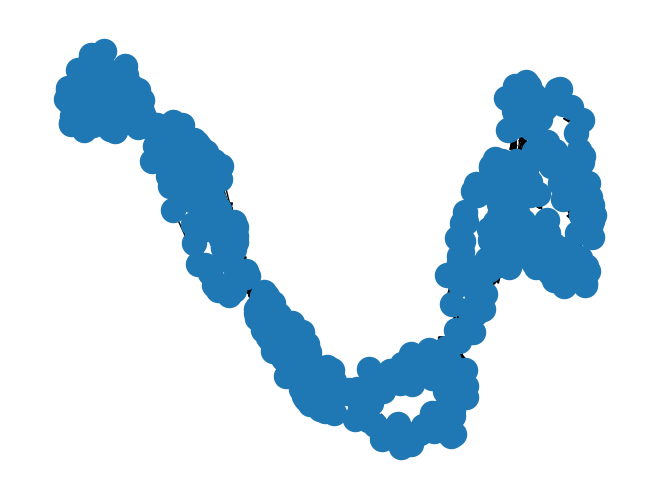

In [40]:
nx.draw(graph)

In [35]:
# Find shortest path from svr to fft
svr_to_fft = nx.MultiDiGraph()
visited = []
output = 1
def check_paths(cur_node: str, final_node, neighbours: list[str], output_graph, print_ = True):
    output_graph.add_node(cur_node)
    if cur_node == final_node:
        return
    
    n_count = 0
    for n in neighbours:
        if print_:
            print("Checking current node", cur_node, "for", n)
        try:
            shortest_path = nx.shortest_path(graph, n, final_node)
        except nx.NetworkXNoPath:
            continue
        n_count += 1
        
        output_graph.add_edge(cur_node, n)
        if not n in visited:
            check_paths(n, final_node, graph.neighbors(n), output_graph)
        visited.append(n)
        
        
            
check_paths("svr", "fft", graph.neighbors("svr"), svr_to_fft)

Checking current node svr for ftk
Checking current node ftk for sum
Checking current node sum for jpd
Checking current node jpd for qdb
Checking current node qdb for cab
Checking current node qdb for szm
Checking current node qdb for kvz
Checking current node kvz for wgk
Checking current node kvz for tsv
Checking current node kvz for iiv
Checking current node kvz for npm
Checking current node kvz for pvm
Checking current node kvz for dhz
Checking current node kvz for swt
Checking current node swt for fft
Checking current node kvz for yby
Checking current node kvz for fju
Checking current node kvz for vnr
Checking current node kvz for qza
Checking current node kvz for ecb
Checking current node kvz for dcu
Checking current node kvz for ntj
Checking current node kvz for qgi
Checking current node kvz for lje
Checking current node kvz for ktu
Checking current node kvz for dvb
Checking current node kvz for gkd
Checking current node kvz for oxi
Checking current node qdb for bvg
Checking curre

In [36]:
len(visited)

305

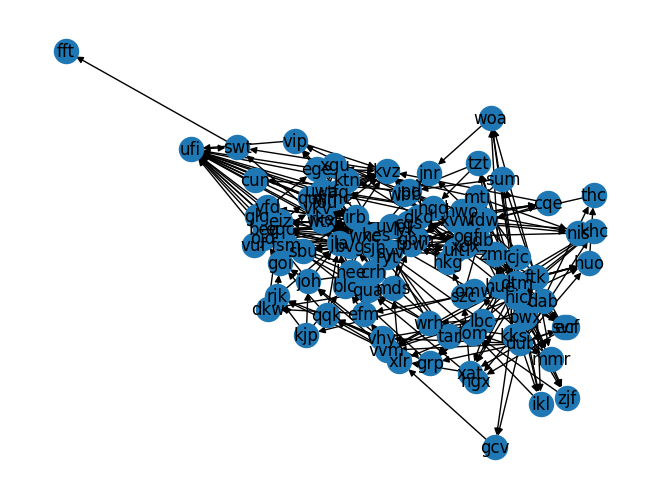

In [ ]:
nx.draw(svr_to_fft, with_labels=True)

In [43]:
count_1 = 0
for p in nx.all_simple_paths(svr_to_fft, "svr", "fft"):
    if count_1 % 100000 == 0:
        print("Count", count_1)
    count_1 += 1
count_1


Count 0


2588

In [37]:
fft_to_doc = nx.MultiDiGraph()
check_paths("fft", "dac", graph.neighbors("fft"), fft_to_doc)

Checking current node fft for ebx
Checking current node ebx for jqr
Checking current node jqr for zwl
Checking current node zwl for idn
Checking current node idn for pat
Checking current node pat for qkl
Checking current node qkl for quu
Checking current node quu for tju
Checking current node tju for fiw
Checking current node fiw for lxr
Checking current node lxr for tnh
Checking current node tnh for cyk
Checking current node tnh for ica
Checking current node tnh for paf
Checking current node tnh for zfo
Checking current node tnh for ypd
Checking current node tnh for eng
Checking current node tnh for jte
Checking current node tnh for lob
Checking current node tnh for qee
Checking current node tnh for fdx
Checking current node fdx for ebf
Checking current node ebf for dhr
Checking current node ebf for utw
Checking current node ebf for dac
Checking current node ebf for wvl
Checking current node ebf for qgv
Checking current node fdx for raa
Checking current node fdx for jkx
Checking curre

In [44]:
count_2 = 0
for p in nx.all_simple_paths(fft_to_doc, "fft", "dac"):
    if count_2 % 100000 == 0:
        print("Count", count_2)
    count_2 += 1
count_2


Count 0
Count 100000
Count 200000
Count 300000
Count 400000
Count 500000
Count 600000
Count 700000
Count 800000
Count 900000
Count 1000000
Count 1100000
Count 1200000
Count 1300000
Count 1400000
Count 1500000
Count 1600000
Count 1700000
Count 1800000
Count 1900000
Count 2000000
Count 2100000
Count 2200000
Count 2300000
Count 2400000
Count 2500000
Count 2600000
Count 2700000
Count 2800000
Count 2900000
Count 3000000
Count 3100000
Count 3200000
Count 3300000
Count 3400000
Count 3500000
Count 3600000
Count 3700000
Count 3800000
Count 3900000
Count 4000000
Count 4100000
Count 4200000
Count 4300000
Count 4400000
Count 4500000
Count 4600000
Count 4700000
Count 4800000
Count 4900000
Count 5000000
Count 5100000
Count 5200000
Count 5300000
Count 5400000
Count 5500000
Count 5600000
Count 5700000
Count 5800000
Count 5900000
Count 6000000
Count 6100000
Count 6200000
Count 6300000
Count 6400000
Count 6500000
Count 6600000
Count 6700000
Count 6800000
Count 6900000
Count 7000000
Count 7100000
Count 7

18007824

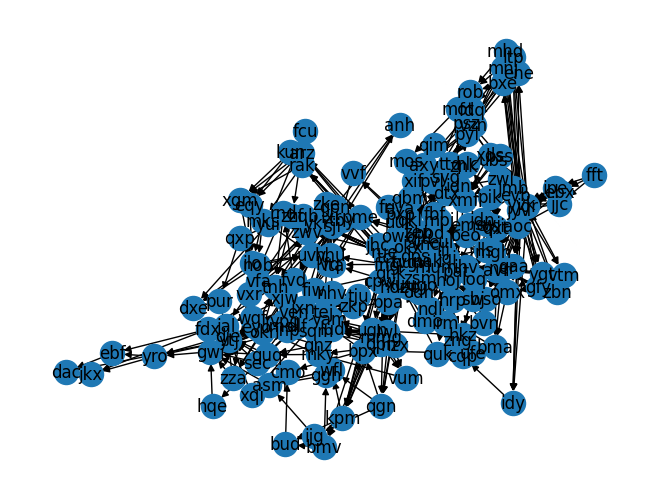

In [40]:
nx.draw(fft_to_doc, with_labels=True)

In [41]:
dac_to_out = list( nx.all_simple_paths(graph, "dac", "out"))

In [42]:
len(dac_to_out)

10289

In [ ]:
combs_count_from_svt_fft = 1
def count_combs(cur, neighbours):
    if cur == "out":
        return 1
    else:
        return sum([count_combs(n, graph.neighbors(n)) for n in neighbours])


In [ ]:
from functools import cache

a = {}
with open("inputs/11.txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        v, l2 = line[:-1].split(': ')
        a[v] = l2.split(' ')

@cache
def np(v, d, f):
    if v == 'out':
        return 1 if d and f else 0
    return sum(np(w, d or v == 'dac', f or v == 'fft') for w in a[v])

print(np('svr', False, False))

KeyError: 'hk'

In [ ]:
from collections import deque
from pathlib import Path
import numpy as np
from scipy.optimize import milp, LinearConstraint, Bounds


def parse_line(line: str) -> tuple[list[str], list[tuple[int, ...]], list[int]]:
    state_part, rest = line.split('] ')
    buttons_part, voltage_part = rest.split(' {')
    
    initial_state = ["0" if c == '.' else "1" for c in state_part[1:]]
    voltage = [int(x) for x in voltage_part[:-1].split(',')]
    buttons = [
        tuple(int(x) for x in b[1:-1].split(','))
        for b in buttons_part.split()
    ]
    
    return initial_state, buttons, voltage


def solve_line_part1(line: str) -> int:
    initial_state, buttons, _ = parse_line(line)
    start = int("".join(initial_state[::-1]), 2)
    button_masks = [sum(1 << idx for idx in button) for button in buttons]

    seen = set()
    queue = deque([(start, 0)])
    while queue:
        state, steps = queue.popleft()
        if state == 0:
            return steps
        if state in seen:
            continue
        seen.add(state)
        for mask in button_masks:
            queue.append((state ^ mask, steps + 1))

    raise ValueError(f"No solution found: {line}")

def solve_part1(data: str) -> int:
    return sum(solve_line_part1(line) for line in data.splitlines())


def solve_line_part2(line: str) -> int:
    """Solve Ax = b where x >= 0 integers, minimizing sum(x)."""
    _, buttons, voltage = parse_line(line)
    n_buttons = len(buttons)
    n_outputs = len(voltage)
    
    # Build matrix A: A[j][i] = 1 if button i affects output j
    A = np.zeros((n_outputs, n_buttons))
    for i, button in enumerate(buttons):
        for idx in button:
            if idx < n_outputs:
                A[idx, i] = 1
    
    b = np.array(voltage)
    
    # Minimize sum(x) subject to Ax = b, x >= 0, x integer
    c = np.ones(n_buttons)  # minimize sum of x
    constraints = LinearConstraint(A, b, b)  # Ax = b
    bounds = Bounds(lb=0, ub=np.inf)
    integrality = np.ones(n_buttons)
    
    result = milp(c, constraints=constraints, bounds=bounds, integrality=integrality)
    
    if not result.success:
        raise ValueError(f"No solution found: {line}")
    
    return int(round(result.fun))


def solve_part2(data: str) -> int:
    return sum(solve_line_part2(line) for line in data.splitlines())


# if __name__ == "__main__":
input_data = Path("inputs/10.txt").read_text().strip()
# print(f"Part 1: {solve_part1(input_data)}")
print(f"Part 2: {solve_part2(input_data)}")

Part 2: 18960


# 12

In [ ]:
from math import prod


with open("inputs/12.txt") as f:
    data = f.read().strip()

res = 0
for l in data.split("\n\n")[-1].split("\n"):
    rxc, *nums = l.split()
    res += prod(map(int, rxc[:-1].split("x"))) >= 7 * sum(map(int, nums))

print(res)

472
